<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/cap_earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
import geopandas as gdp
from shapely.geometry import Point

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score,  RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor,  RandomForestRegressor,  StackingRegressor
from sklearn.tree import DecisionTreeRegressor

In [7]:
earthquake = pd.read_csv('/content/all_month.csv')
earthquake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-06-23T02:43:55.360Z,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,...,2024-06-23T02:45:57.808Z,"20 km NE of Warner Springs, CA",earthquake,0.90,1.71,0.205,7.0,automatic,ci,ci
1,2024-06-23T02:36:14.460Z,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,...,2024-06-23T02:37:51.798Z,"7 km WNW of Cobb, CA",earthquake,0.20,0.38,0.180,27.0,automatic,nc,nc
2,2024-06-23T02:28:48.780Z,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,...,2024-06-23T02:30:27.436Z,"12 km NW of The Geysers, CA",earthquake,0.71,1.08,0.170,8.0,automatic,nc,nc
3,2024-06-23T02:28:34.590Z,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,...,2024-06-23T02:30:14.310Z,"6 km SSW of Volcano, Hawaii",earthquake,0.15,0.20,0.250,13.0,automatic,hv,hv
4,2024-06-23T02:23:14.910Z,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,...,2024-06-23T02:24:50.430Z,"1 km W of The Geysers, CA",earthquake,0.30,0.49,0.270,10.0,automatic,nc,nc


In [8]:
earthquake.shape

(10037, 22)

In [9]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10037 non-null  object 
 1   latitude         10037 non-null  float64
 2   longitude        10037 non-null  float64
 3   depth            10037 non-null  float64
 4   mag              10037 non-null  float64
 5   magType          10037 non-null  object 
 6   nst              8568 non-null   float64
 7   gap              8568 non-null   float64
 8   dmin             8555 non-null   float64
 9   rms              10037 non-null  float64
 10  net              10037 non-null  object 
 11  id               10037 non-null  object 
 12  updated          10037 non-null  object 
 13  place            10037 non-null  object 
 14  type             10037 non-null  object 
 15  horizontalError  7886 non-null   float64
 16  depthError       10037 non-null  float64
 17  magError    

In [ ]:
earthquake['type'].unique()

array(['earthquake', 'quarry blast', 'explosion', 'other event',
       'ice quake'], dtype=object)

In [ ]:
earthquake.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

**DATA CLEANING**

In [ ]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10037 non-null  object 
 1   latitude         10037 non-null  float64
 2   longitude        10037 non-null  float64
 3   depth            10037 non-null  float64
 4   mag              10037 non-null  float64
 5   magType          10037 non-null  object 
 6   nst              8568 non-null   float64
 7   gap              8568 non-null   float64
 8   dmin             8555 non-null   float64
 9   rms              10037 non-null  float64
 10  net              10037 non-null  object 
 11  id               10037 non-null  object 
 12  updated          10037 non-null  object 
 13  place            10037 non-null  object 
 14  type             10037 non-null  object 
 15  horizontalError  7886 non-null   float64
 16  depthError       10037 non-null  float64
 17  magError    

In [ ]:
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1469
gap                1469
dmin               1482
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2151
depthError            0
magError           1512
magNst             1469
status                0
locationSource        0
magSource             0
dtype: int64

In [ ]:
missing_percent = earthquake.isnull().mean()*100
missing_percent

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                14.635847
gap                14.635847
dmin               14.765368
rms                 0.000000
net                 0.000000
id                  0.000000
updated             0.000000
place               0.000000
type                0.000000
horizontalError    21.430706
depthError          0.000000
magError           15.064262
magNst             14.635847
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [10]:
earthquake.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10037.000000,10037.000000,10037.000000,10037.000000,8568.000000,8568.000000,8555.000000,10037.000000,7886.000000,10037.000000,8525.000000,8568.000000
mean,37.748876,-109.803759,20.514962,1.532087,22.857026,115.491135,0.497377,0.260827,1.640674,3.069083,0.192789,16.388655
std,18.882656,73.657731,53.832264,1.236795,21.388877,68.879586,2.250743,0.273966,3.026952,78.588719,0.119507,25.446712
min,-64.011900,-179.965700,-6.300000,-1.470000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.903500,-151.347800,2.480000,0.760000,9.000000,65.000000,0.010620,0.090000,0.260000,0.450000,0.111191,6.000000
50%,38.534167,-122.709833,6.880000,1.300000,17.000000,95.000000,0.043540,0.160000,0.443929,0.750000,0.170000,10.000000
75%,51.830700,-115.121200,13.830000,1.970000,29.000000,148.000000,0.112550,0.320000,1.080000,1.600000,0.240000,18.000000
max,82.905800,179.996500,651.481000,6.600000,319.000000,352.000000,53.210000,2.600000,28.350000,7836.900000,1.320000,608.000000


<Axes: >

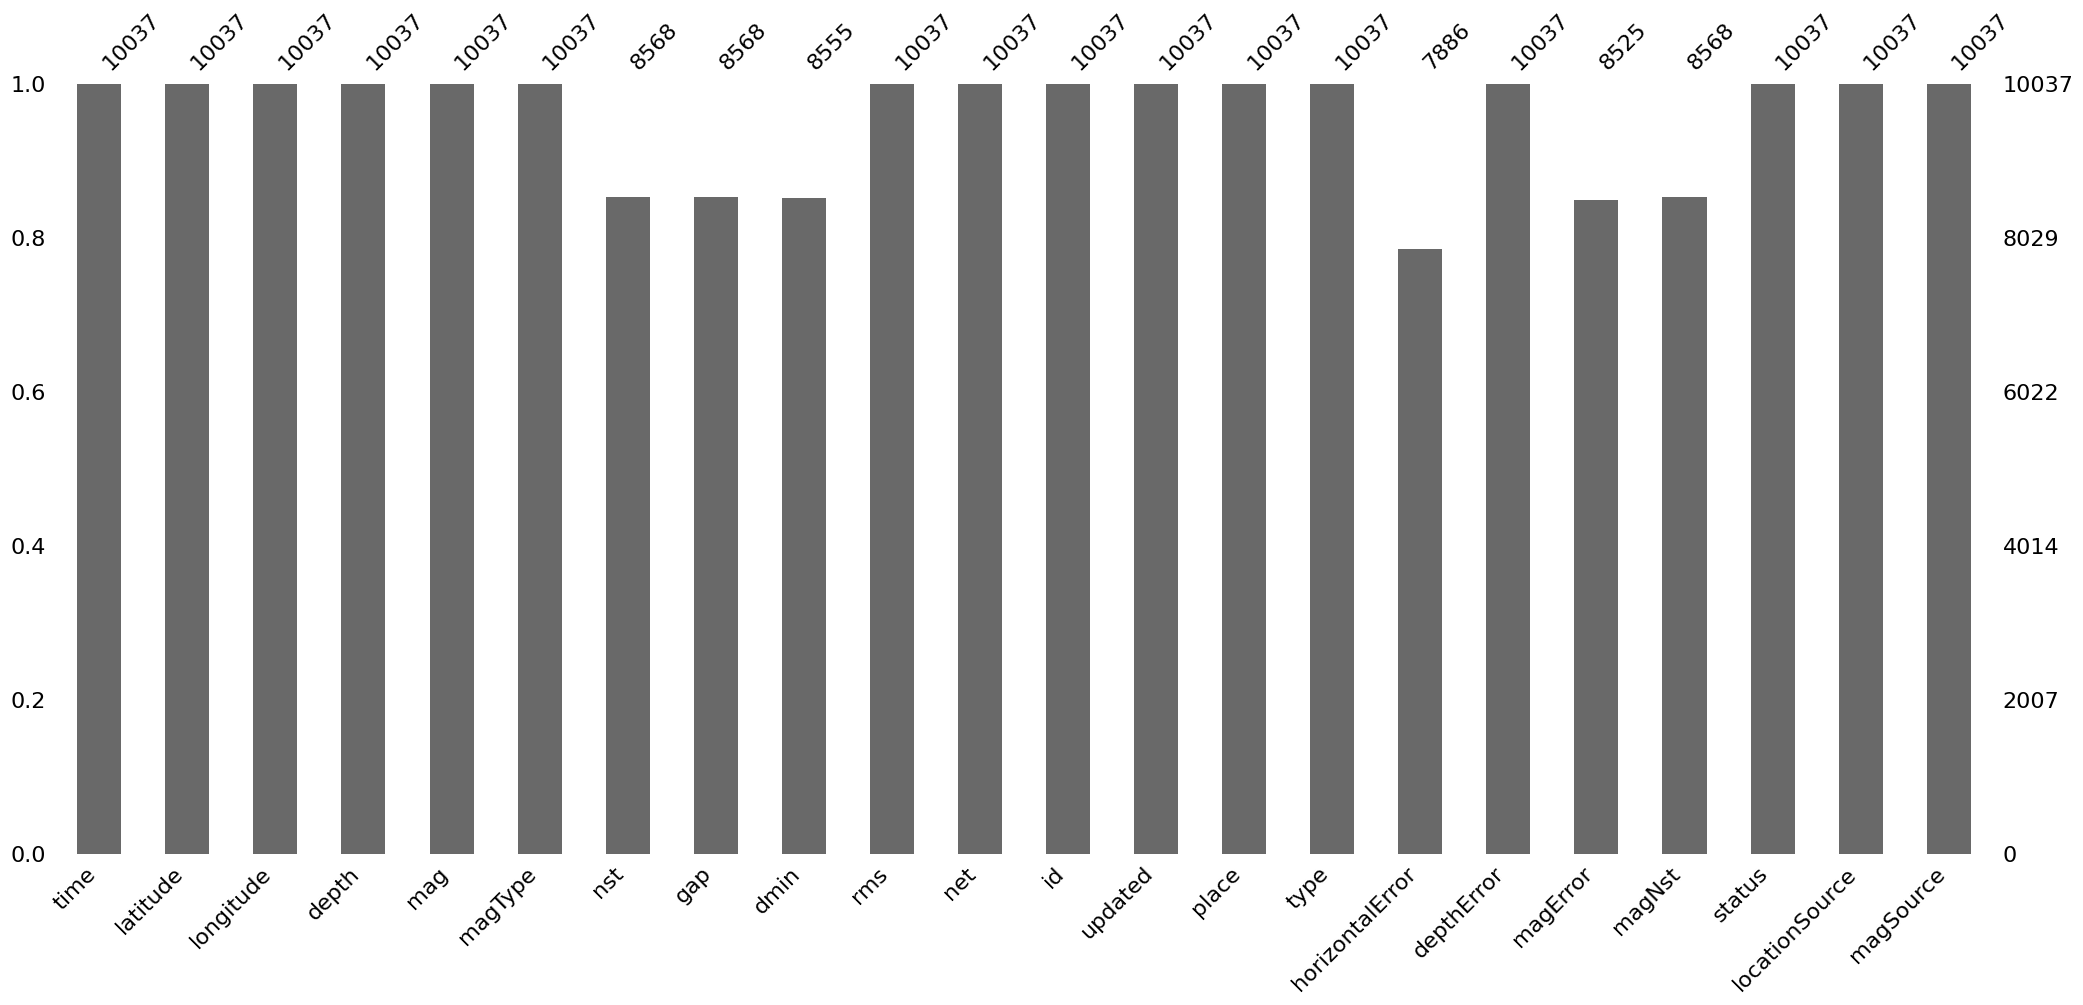

In [ ]:
msno.bar(earthquake)

<Axes: >

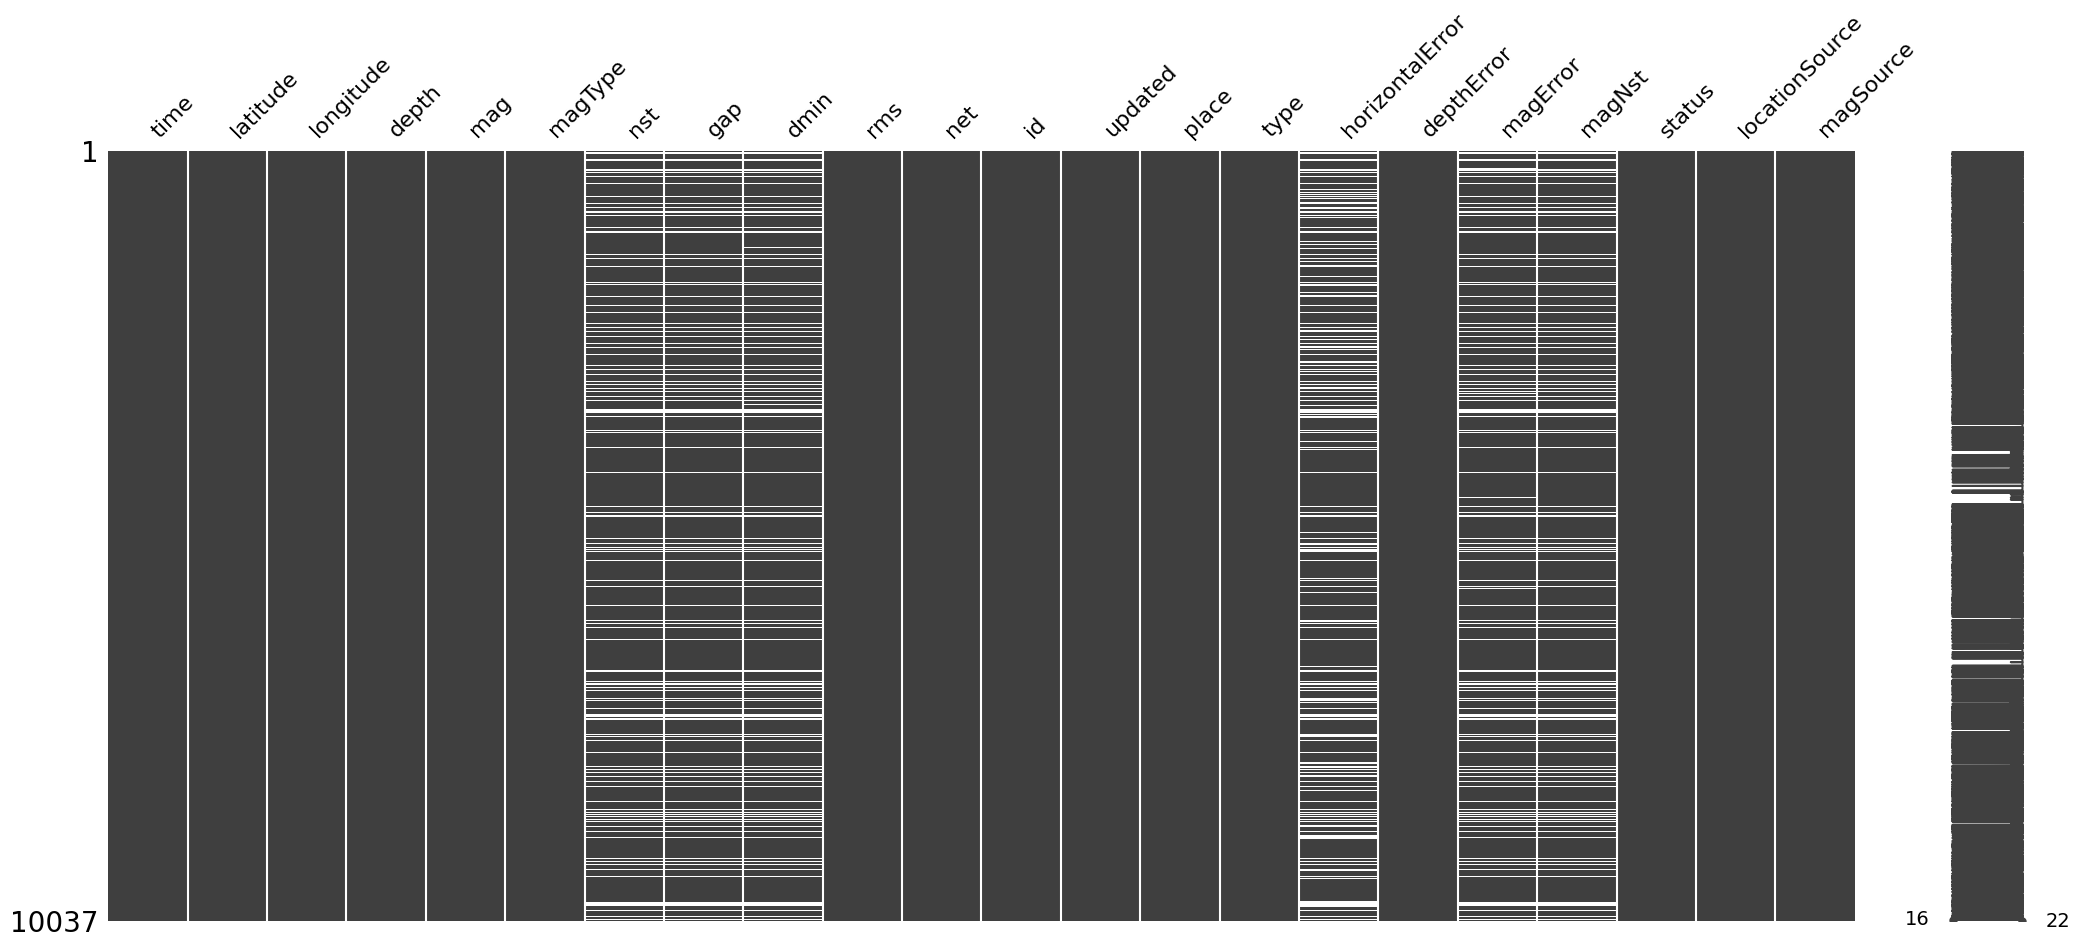

In [ ]:
msno.matrix(earthquake)

<Axes: >

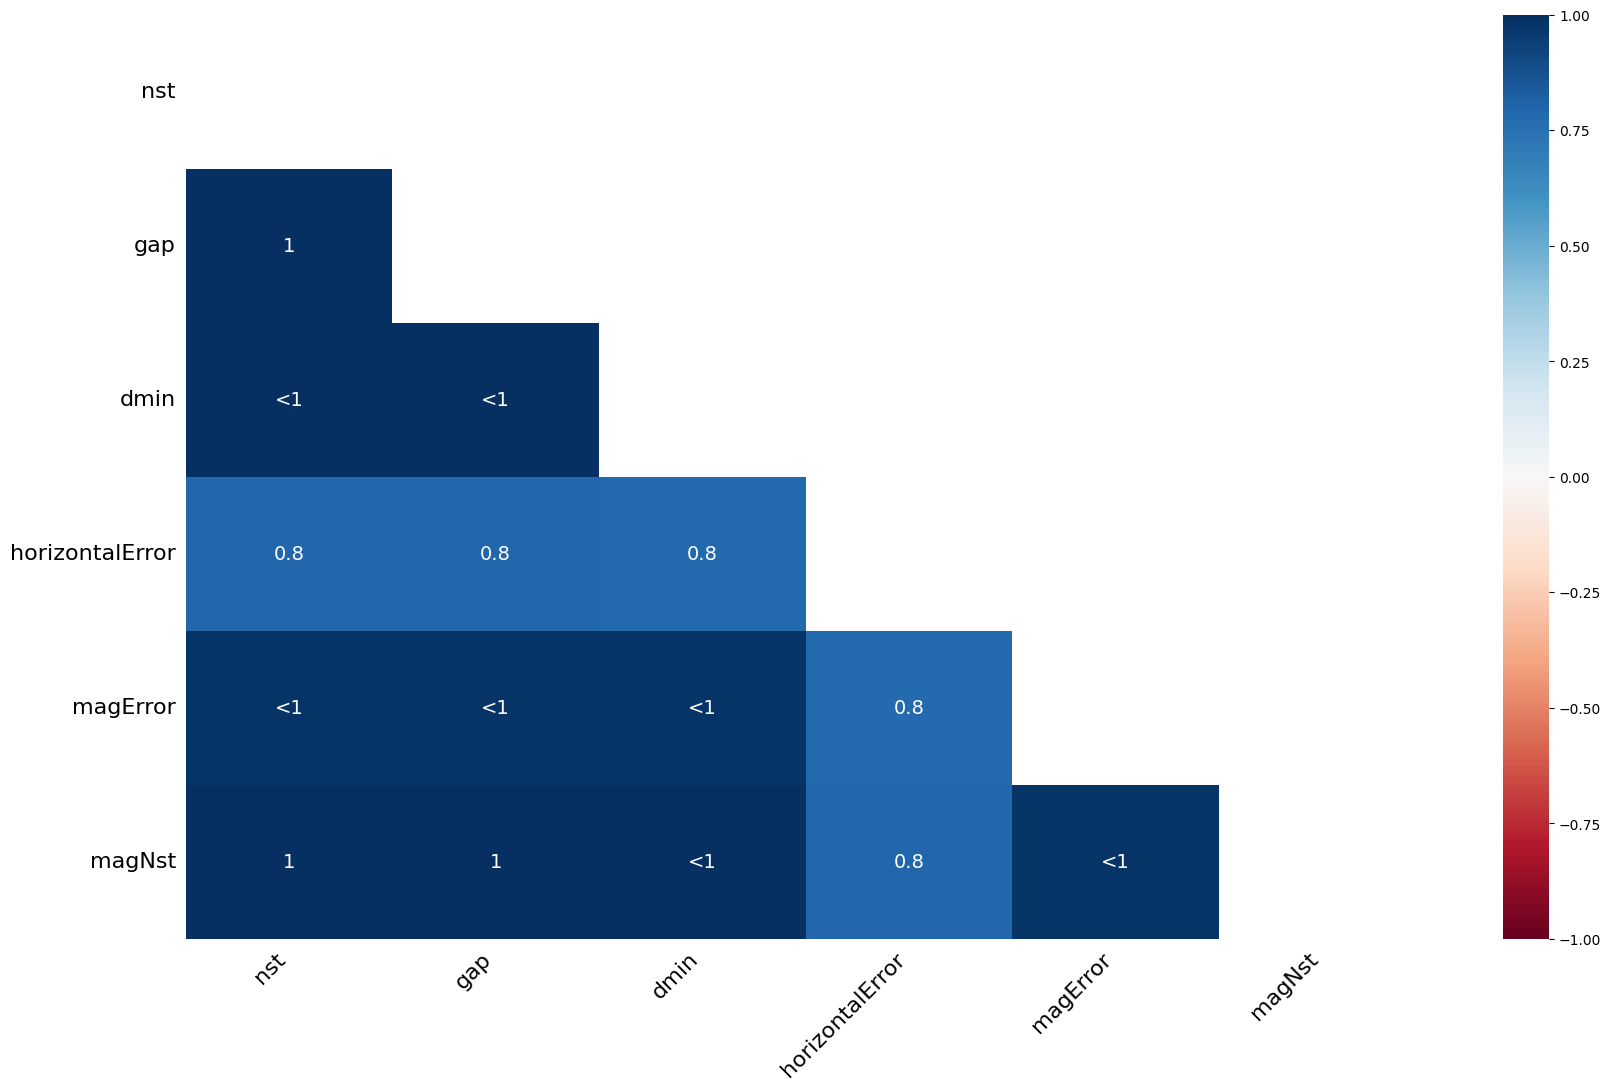

In [ ]:
msno.heatmap(earthquake)

This column(nst) the values are missing completely at random because of maybe technical problems or human error while recording the number of stations and thus affecting the remaining columns (gap, dmin, horizontalError, magError and magNst) which are totally dependent the on the number of stations hence they are missing not at random. I decided to drop all of the rows missing these vales

In [ ]:
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                   0
gap                1469
dmin                  0
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError       0
depthError            0
magError           1512
magNst                0
status                0
locationSource        0
magSource             0
dtype: int64

In [11]:
#Converting updated columns to datetime
earthquake['updated'] = pd.to_datetime(earthquake['updated'])

In [12]:

earthquake['updated_date'] = earthquake['updated'].dt.date
earthquake['updated_time'] = earthquake['updated'].dt.time



In [13]:
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,updated_date,updated_time
0,2024-06-23T02:43:55.360Z,33.412498,-116.486168,12.1400,1.03,ml,19.0,102.0,0.127000,0.23,...,earthquake,0.900000,1.710000,0.205000,7.0,automatic,ci,ci,2024-06-23,02:45:57.808000
1,2024-06-23T02:36:14.460Z,38.834835,-122.807335,2.2100,1.28,md,27.0,50.0,0.011620,0.02,...,earthquake,0.200000,0.380000,0.180000,27.0,automatic,nc,nc,2024-06-23,02:37:51.798000
2,2024-06-23T02:28:48.780Z,38.840168,-122.873001,1.8700,0.27,md,8.0,97.0,0.003424,0.05,...,earthquake,0.710000,1.080000,0.170000,8.0,automatic,nc,nc,2024-06-23,02:30:27.436000
3,2024-06-23T02:28:34.590Z,19.390333,-155.253326,0.6700,1.89,md,18.0,49.0,0.005162,0.12,...,earthquake,0.150000,0.200000,0.250000,13.0,automatic,hv,hv,2024-06-23,02:30:14.310000
4,2024-06-23T02:23:14.910Z,38.777168,-122.766335,1.1100,1.02,md,9.0,88.0,0.006454,0.02,...,earthquake,0.300000,0.490000,0.270000,10.0,automatic,nc,nc,2024-06-23,02:24:50.430000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2024-05-24T02:54:42.020Z,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,earthquake,0.830000,1.210000,0.159675,7.0,reviewed,av,av,2024-05-25,05:04:45.910000
10033,2024-05-24T02:54:40.240Z,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,earthquake,0.250000,0.510000,0.150000,12.0,automatic,nc,nc,2024-05-24,02:56:19.258000
10034,2024-05-24T02:54:37.130Z,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,earthquake,0.370000,0.990000,0.130000,9.0,automatic,nc,nc,2024-05-24,02:56:14.293000
10035,2024-05-24T02:53:35.771Z,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,earthquake,0.865652,0.701343,0.200000,15.0,reviewed,tx,tx,2024-05-24,14:48:25.442000


In [14]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             10037 non-null  object             
 1   latitude         10037 non-null  float64            
 2   longitude        10037 non-null  float64            
 3   depth            10037 non-null  float64            
 4   mag              10037 non-null  float64            
 5   magType          10037 non-null  object             
 6   nst              8568 non-null   float64            
 7   gap              8568 non-null   float64            
 8   dmin             8555 non-null   float64            
 9   rms              10037 non-null  float64            
 10  net              10037 non-null  object             
 11  id               10037 non-null  object             
 12  updated          10037 non-null  datetime64[ns, UTC]
 13  place           

In [ ]:
earthquake.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_hours
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,av,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000,1,7803,2.167500
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,nc,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000,0,99,0.027500
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,nc,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000,0,97,0.026944
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,tx,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000,0,42889,11.913611
10036,2024-05-24 02:49:34.160000+00:00,38.814835,-122.824837,2.0100,1.07,md,16.0,58.0,0.006856,0.02,...,nc,nc,2024-05-24,02:49:34.160000,2024-05-24,02:51:09.581000,0 days 00:01:35.421000,0,95,0.026389


In [16]:
earthquake['actual_place'] = earthquake['place'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else x)
print(earthquake[['place', 'actual_place']])

                                place actual_place
0      20 km NE of Warner Springs, CA           CA
1                7 km WNW of Cobb, CA           CA
2         12 km NW of The Geysers, CA           CA
3         6 km SSW of Volcano, Hawaii       Hawaii
4           1 km W of The Geysers, CA           CA
...                               ...          ...
10032     85 km NNW of Karluk, Alaska       Alaska
10033      9 km NW of The Geysers, CA           CA
10034     8 km NNW of The Geysers, CA           CA
10035        30 km NW of Toyah, Texas        Texas
10036      7 km NW of The Geysers, CA           CA

[10037 rows x 2 columns]


In [17]:
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,updated_date,updated_time,actual_place
0,2024-06-23T02:43:55.360Z,33.412498,-116.486168,12.1400,1.03,ml,19.0,102.0,0.127000,0.23,...,0.900000,1.710000,0.205000,7.0,automatic,ci,ci,2024-06-23,02:45:57.808000,CA
1,2024-06-23T02:36:14.460Z,38.834835,-122.807335,2.2100,1.28,md,27.0,50.0,0.011620,0.02,...,0.200000,0.380000,0.180000,27.0,automatic,nc,nc,2024-06-23,02:37:51.798000,CA
2,2024-06-23T02:28:48.780Z,38.840168,-122.873001,1.8700,0.27,md,8.0,97.0,0.003424,0.05,...,0.710000,1.080000,0.170000,8.0,automatic,nc,nc,2024-06-23,02:30:27.436000,CA
3,2024-06-23T02:28:34.590Z,19.390333,-155.253326,0.6700,1.89,md,18.0,49.0,0.005162,0.12,...,0.150000,0.200000,0.250000,13.0,automatic,hv,hv,2024-06-23,02:30:14.310000,Hawaii
4,2024-06-23T02:23:14.910Z,38.777168,-122.766335,1.1100,1.02,md,9.0,88.0,0.006454,0.02,...,0.300000,0.490000,0.270000,10.0,automatic,nc,nc,2024-06-23,02:24:50.430000,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2024-05-24T02:54:42.020Z,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,0.830000,1.210000,0.159675,7.0,reviewed,av,av,2024-05-25,05:04:45.910000,Alaska
10033,2024-05-24T02:54:40.240Z,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,0.250000,0.510000,0.150000,12.0,automatic,nc,nc,2024-05-24,02:56:19.258000,CA
10034,2024-05-24T02:54:37.130Z,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,0.370000,0.990000,0.130000,9.0,automatic,nc,nc,2024-05-24,02:56:14.293000,CA
10035,2024-05-24T02:53:35.771Z,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,0.865652,0.701343,0.200000,15.0,reviewed,tx,tx,2024-05-24,14:48:25.442000,Texas


In [18]:
earthquake.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'updated_date', 'updated_time',
       'actual_place'],
      dtype='object')

In [20]:
columns_to_drop = ['time', 'latitude', 'longitude', 'magType', 'id','locationSource', 'magSource','place' ]
earthquake.drop(columns_to_drop, axis=1, inplace=True)

In [21]:
earthquake.dropna(inplace=True)

In [23]:
earthquake.shape

(7831, 17)

In [24]:
earthquake.describe()

,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000
mean,18.268319,1.579609,22.650492,114.499286,0.532744,0.204270,1.643387,2.348106,0.186887,16.922743
std,57.692275,1.346669,21.099879,68.913517,2.349057,0.233486,3.030663,5.231179,0.113861,26.308777
min,-3.400000,-1.220000,0.000000,14.000000,0.000000,0.000000,0.000000,0.080000,0.000000,1.000000
25%,2.260000,0.710000,9.000000,65.000000,0.010040,0.070000,0.260000,0.480000,0.110000,6.000000
50%,6.190000,1.260000,17.000000,93.000000,0.040320,0.130000,0.440423,0.779933,0.166000,11.000000
75%,11.260000,2.100000,28.000000,147.000000,0.107550,0.210000,1.080000,1.677500,0.231000,19.000000
max,651.481000,6.600000,319.000000,352.000000,53.210000,2.600000,28.350000,31.610000,1.320000,608.000000


In [30]:
earthquake.drop(columns=['updated'], inplace=True)

In [31]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7831 entries, 0 to 10036
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   depth            7831 non-null   float64       
 1   mag              7831 non-null   float64       
 2   nst              7831 non-null   float64       
 3   gap              7831 non-null   float64       
 4   dmin             7831 non-null   float64       
 5   rms              7831 non-null   float64       
 6   net              7831 non-null   object        
 7   type             7831 non-null   object        
 8   horizontalError  7831 non-null   float64       
 9   depthError       7831 non-null   float64       
 10  magError         7831 non-null   float64       
 11  magNst           7831 non-null   float64       
 12  status           7831 non-null   object        
 13  updated_date     7831 non-null   datetime64[ns]
 14  updated_time     7831 non-null   object     

In [28]:
earthquake['updated_date'] = pd.to_datetime(earthquake['updated_date'])


In [33]:
#earthquake['updated_time'] = pd.to_datetime(earthquake['updated_time'])

Savint the cleaned dataframe

In [34]:
earthquake.to_csv('cleaned_earthquake.csv',index=False)

EXPLORATORY

In [35]:
cleaned_earthquake = pd.read_csv('/content/cleaned_earthquake.csv')
cleaned_earthquake.head()

,depth,mag,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,updated_date,updated_time,actual_place
0,12.14,1.03,19.0,102.0,0.127000,0.23,ci,earthquake,0.90,1.71,0.205,7.0,automatic,2024-06-23,02:45:57.808000,CA
1,2.21,1.28,27.0,50.0,0.011620,0.02,nc,earthquake,0.20,0.38,0.180,27.0,automatic,2024-06-23,02:37:51.798000,CA
2,1.87,0.27,8.0,97.0,0.003424,0.05,nc,earthquake,0.71,1.08,0.170,8.0,automatic,2024-06-23,02:30:27.436000,CA
3,0.67,1.89,18.0,49.0,0.005162,0.12,hv,earthquake,0.15,0.20,0.250,13.0,automatic,2024-06-23,02:30:14.310000,Hawaii
4,1.11,1.02,9.0,88.0,0.006454,0.02,nc,earthquake,0.30,0.49,0.270,10.0,automatic,2024-06-23,02:24:50.430000,CA


In [36]:
cleaned_earthquake.columns

Index(['depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'net', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'updated_date', 'updated_time', 'actual_place'],
      dtype='object')

In [37]:
cleaned_earthquake['type'].value_counts()

type
earthquake      7694
quarry blast      80
explosion         54
other event        3
Name: count, dtype: int64

In [46]:
cleaned_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7831 entries, 0 to 7830
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   depth            7831 non-null   float64       
 1   mag              7831 non-null   float64       
 2   nst              7831 non-null   float64       
 3   gap              7831 non-null   float64       
 4   dmin             7831 non-null   float64       
 5   rms              7831 non-null   float64       
 6   net              7831 non-null   object        
 7   type             7831 non-null   object        
 8   horizontalError  7831 non-null   float64       
 9   depthError       7831 non-null   float64       
 10  magError         7831 non-null   float64       
 11  magNst           7831 non-null   float64       
 12  status           7831 non-null   object        
 13  updated_date     7831 non-null   datetime64[ns]
 14  updated_time     7831 non-null   datetim

In [45]:
cleaned_earthquake['updated_date'] = pd.to_datetime(cleaned_earthquake['updated_date'])

In [43]:
cleaned_earthquake['updated_time'] = pd.to_datetime(cleaned_earthquake['updated_time'])

<ipython-input-43-d86a92eb1d53>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_earthquake['updated_time'] = pd.to_datetime(cleaned_earthquake['updated_time'])


EXPLORATORY DATA ANALYSIS

In [39]:
cleaned_earthquake.head()

,depth,mag,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,updated_date,updated_time,actual_place
0,12.14,1.03,19.0,102.0,0.127000,0.23,ci,earthquake,0.90,1.71,0.205,7.0,automatic,2024-06-23,02:45:57.808000,CA
1,2.21,1.28,27.0,50.0,0.011620,0.02,nc,earthquake,0.20,0.38,0.180,27.0,automatic,2024-06-23,02:37:51.798000,CA
2,1.87,0.27,8.0,97.0,0.003424,0.05,nc,earthquake,0.71,1.08,0.170,8.0,automatic,2024-06-23,02:30:27.436000,CA
3,0.67,1.89,18.0,49.0,0.005162,0.12,hv,earthquake,0.15,0.20,0.250,13.0,automatic,2024-06-23,02:30:14.310000,Hawaii
4,1.11,1.02,9.0,88.0,0.006454,0.02,nc,earthquake,0.30,0.49,0.270,10.0,automatic,2024-06-23,02:24:50.430000,CA


In [42]:
cleaned_earthquake.describe()

,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000,7831.000000
mean,18.268319,1.579609,22.650492,114.499286,0.532744,0.204270,1.643387,2.348106,0.186887,16.922743
std,57.692275,1.346669,21.099879,68.913517,2.349057,0.233486,3.030663,5.231179,0.113861,26.308777
min,-3.400000,-1.220000,0.000000,14.000000,0.000000,0.000000,0.000000,0.080000,0.000000,1.000000
25%,2.260000,0.710000,9.000000,65.000000,0.010040,0.070000,0.260000,0.480000,0.110000,6.000000
50%,6.190000,1.260000,17.000000,93.000000,0.040320,0.130000,0.440423,0.779933,0.166000,11.000000
75%,11.260000,2.100000,28.000000,147.000000,0.107550,0.210000,1.080000,1.677500,0.231000,19.000000
max,651.481000,6.600000,319.000000,352.000000,53.210000,2.600000,28.350000,31.610000,1.320000,608.000000


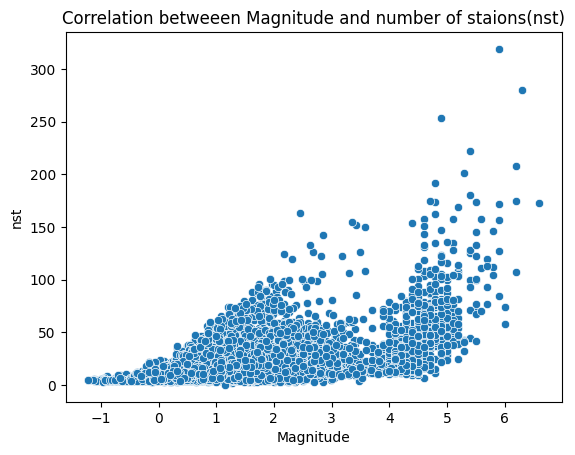

In [47]:
sns.scatterplot(x='mag', y='nst', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('nst')
plt.title('Correlation betweeen Magnitude and number of staions(nst)')
plt.show()

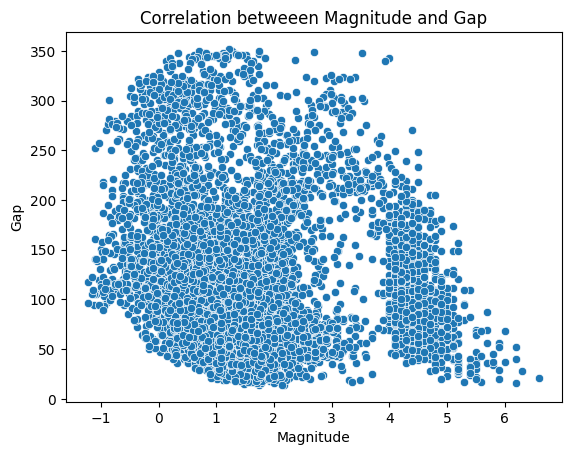

In [48]:
sns.scatterplot(x='mag', y='gap', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('Gap')
plt.title('Correlation betweeen Magnitude and Gap')
plt.show()

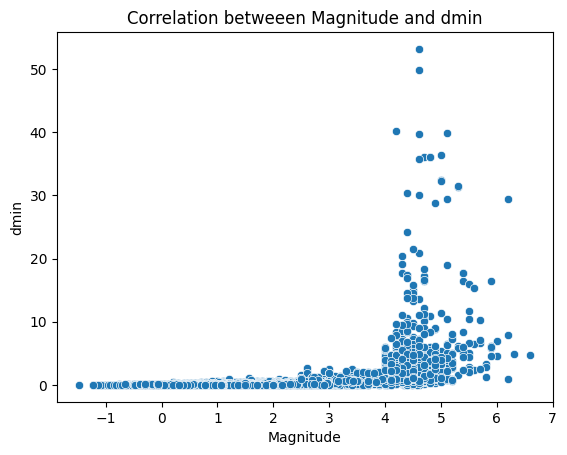

In [ ]:
sns.scatterplot(x='mag', y='dmin', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('dmin')
plt.title('Correlation betweeen Magnitude and dmin')
plt.show()

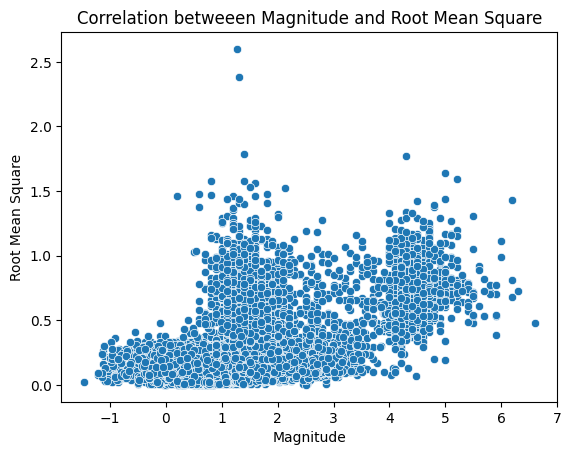

In [ ]:
sns.scatterplot(x='mag', y='rms', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('Root Mean Square')
plt.title('Correlation betweeen Magnitude and Root Mean Square')
plt.show()

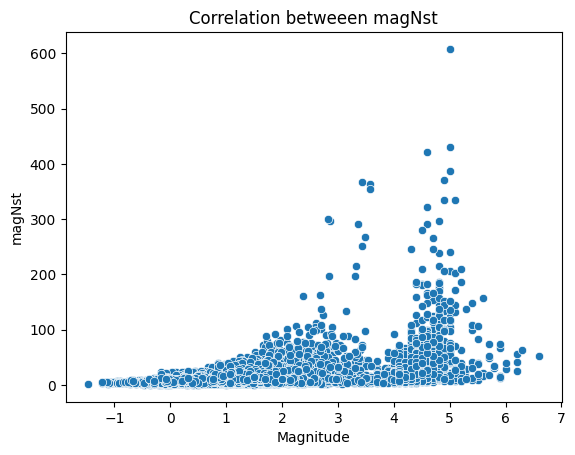

In [ ]:
sns.scatterplot(x='mag', y='magNst', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('magNst')
plt.title('Correlation betweeen magNst')
plt.show()

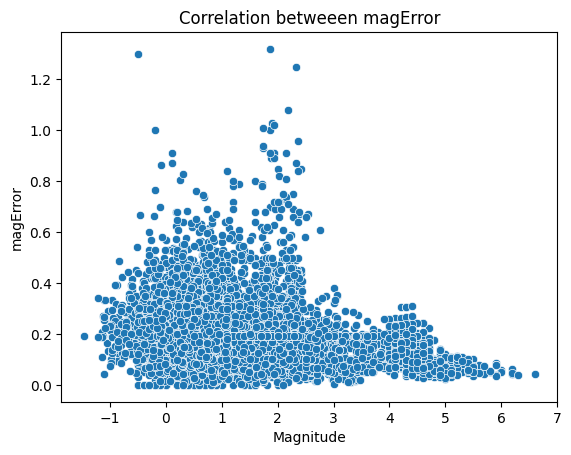

In [ ]:
sns.scatterplot(x='mag', y='magError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('magError')
plt.title('Correlation betweeen magError')
plt.show()

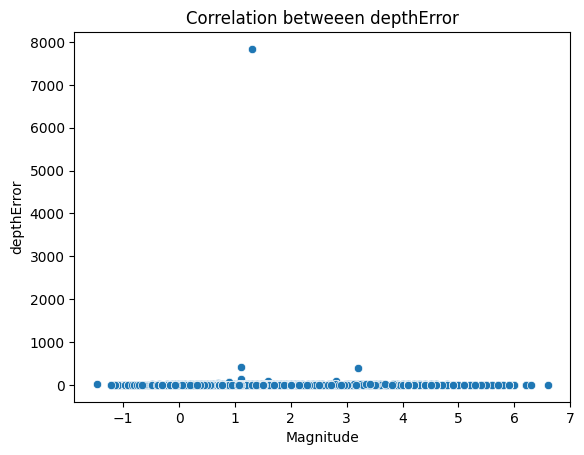

In [ ]:
sns.scatterplot(x='mag', y='depthError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('depthError')
plt.title('Correlation betweeen depthError')
plt.show()

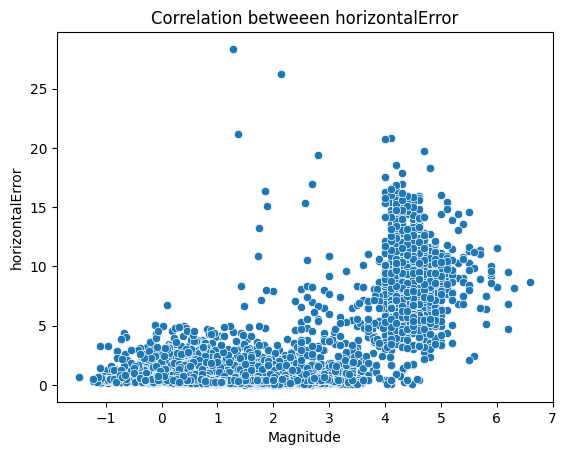

In [ ]:
sns.scatterplot(x='mag', y='horizontalError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('horizontalError')
plt.title('Correlation betweeen horizontalError')
plt.show()

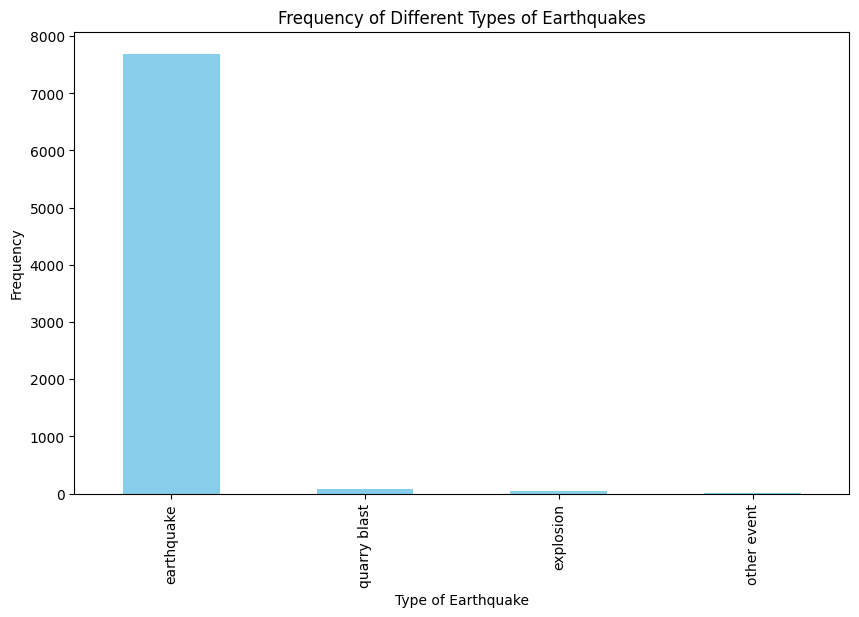

In [49]:
type_counts = cleaned_earthquake['type'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Frequency')
plt.xlabel('Type of Earthquake')
plt.title('Frequency of Different Types of Earthquakes')
plt.savefig('earthquakes_types.png')
plt.show()

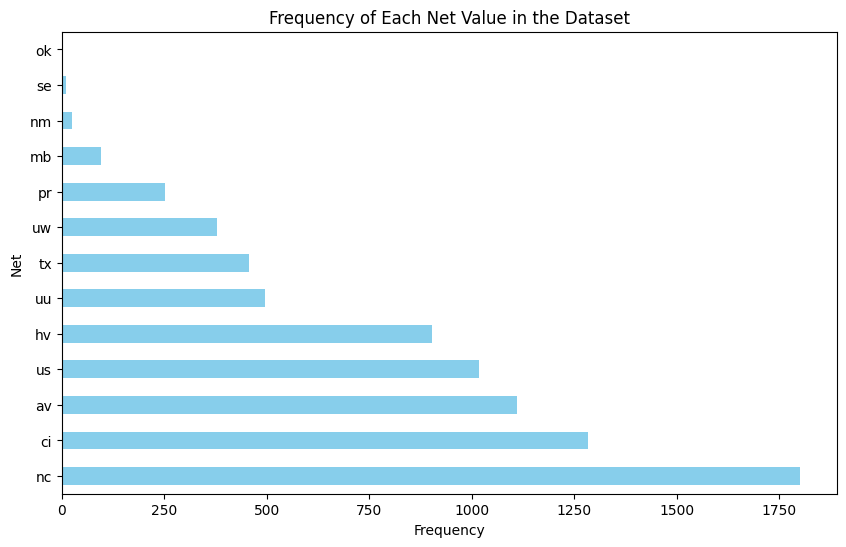

In [50]:
net_counts = cleaned_earthquake['net'].value_counts()

plt.figure(figsize=(10, 6))
net_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Net')
plt.title('Frequency of Each Net Value in the Dataset')
plt.savefig('Network_rankings.png')
plt.show()

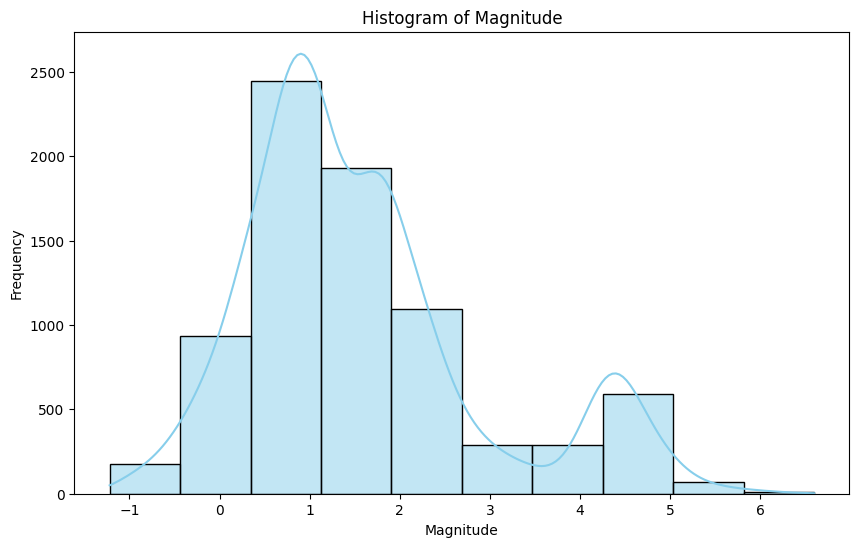

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_earthquake['mag'], kde=True, bins=10, color='skyblue')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Magnitude')
plt.savefig('magnitude_distribution.png')
plt.show()

In [55]:
cleaned_earthquake.head()

,depth,mag,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,updated_date,updated_time,actual_place
0,12.14,1.03,19.0,102.0,0.127000,0.23,ci,earthquake,0.90,1.71,0.205,7.0,automatic,2024-06-23,2024-07-08 02:45:57,CA
1,2.21,1.28,27.0,50.0,0.011620,0.02,nc,earthquake,0.20,0.38,0.180,27.0,automatic,2024-06-23,2024-07-08 02:37:51,CA
2,1.87,0.27,8.0,97.0,0.003424,0.05,nc,earthquake,0.71,1.08,0.170,8.0,automatic,2024-06-23,2024-07-08 02:30:27,CA
3,0.67,1.89,18.0,49.0,0.005162,0.12,hv,earthquake,0.15,0.20,0.250,13.0,automatic,2024-06-23,2024-07-08 02:30:14,Hawaii
4,1.11,1.02,9.0,88.0,0.006454,0.02,nc,earthquake,0.30,0.49,0.270,10.0,automatic,2024-06-23,2024-07-08 02:24:50,CA


In [53]:
cleaned_earthquake['updated_time']

0      2024-07-08 02:45:57
1      2024-07-08 02:37:51
2      2024-07-08 02:30:27
3      2024-07-08 02:30:14
4      2024-07-08 02:24:50
               ...        
7826   2024-07-08 05:04:45
7827   2024-07-08 02:56:19
7828   2024-07-08 02:56:14
7829   2024-07-08 14:48:25
7830   2024-07-08 02:51:09
Name: updated_time, Length: 7831, dtype: datetime64[ns]

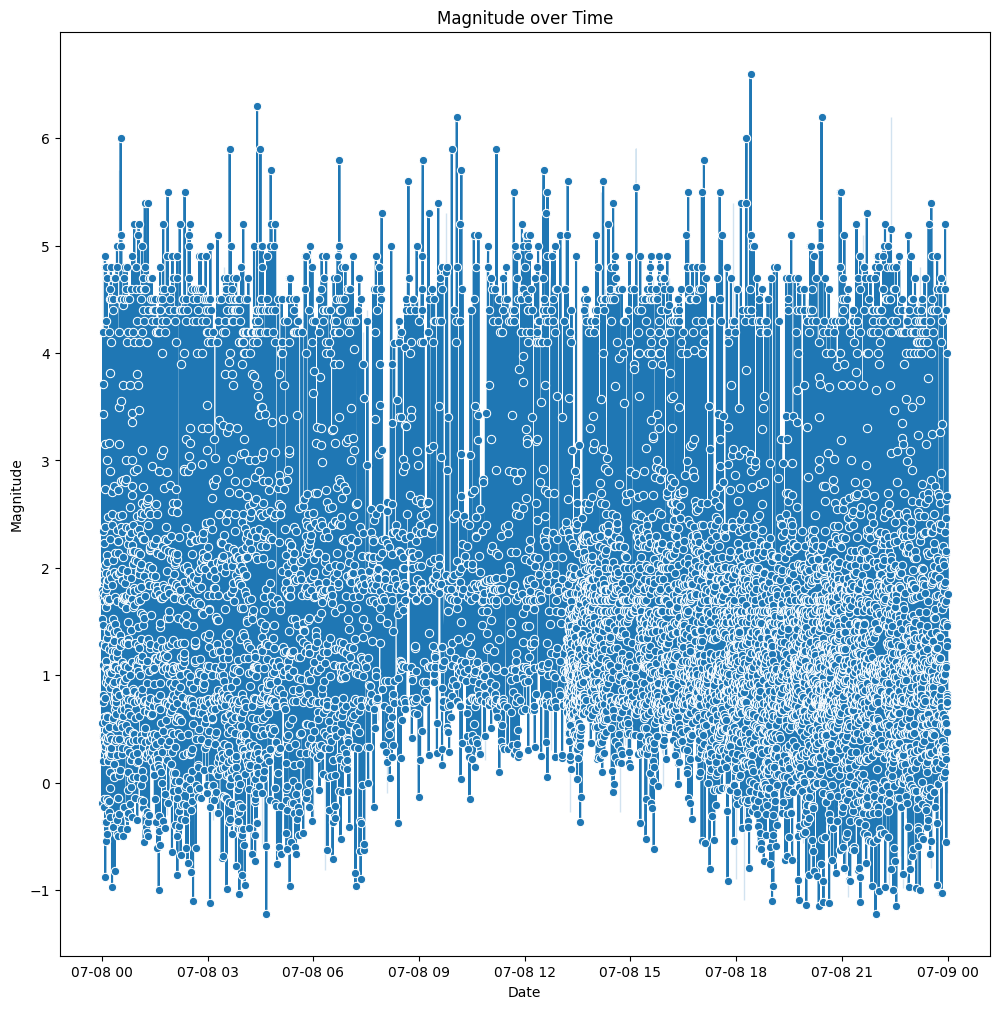

In [52]:
plt.figure(figsize=(12, 12))
sns.lineplot(x='updated_time', y='mag', data=cleaned_earthquake, marker='o')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Magnitude over Time')
plt.show()

In [ ]:
world_data = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
world_data

<ipython-input-60-f4309da0851e>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
#Converting to GeoDataFrame
geometry = [Point(xy) for xy in zip(cleaned_earthquake['longitude'],cleaned_earthquake['latitude'])]
geo_df = gdp.GeoDataFrame(cleaned_earthquake, geometry=geometry)
geo_df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,horizontalError,depthError,magError,magNst,status,updated_date,duration_time,duration_hours,actual_place,geometry
0,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,ci,...,0.90,1.71,0.205,7.0,automatic,2024-06-23,122,0.033889,CA,POINT (-116.48617 33.41250)
1,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,nc,...,0.20,0.38,0.180,27.0,automatic,2024-06-23,97,0.026944,CA,POINT (-122.80733 38.83484)
2,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,nc,...,0.71,1.08,0.170,8.0,automatic,2024-06-23,98,0.027222,CA,POINT (-122.87300 38.84017)
3,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,hv,...,0.15,0.20,0.250,13.0,automatic,2024-06-23,99,0.027500,Hawaii,POINT (-155.25333 19.39033)
4,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,nc,...,0.30,0.49,0.270,10.0,automatic,2024-06-23,95,0.026389,CA,POINT (-122.76633 38.77717)


In [ ]:
geo_df.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'net', 'type', 'horizontalError', 'depthError',
       'magError', 'magNst', 'status', 'updated_date', 'duration_time',
       'duration_hours', 'actual_place', 'geometry'],
      dtype='object')

In [ ]:
columns_to_drop = ['latitude', 'longitude', 'depth',  'magType', 'gap',
       'dmin', 'rms', 'horizontalError', 'depthError',
       'magError', 'magNst', 'status', 'updated_date', 'duration_time' ]
geo_df.drop(columns_to_drop, axis=1, inplace=True)
geo_df.head()

,mag,nst,net,type,duration_hours,actual_place,geometry
0,1.03,19.0,ci,earthquake,0.033889,CA,POINT (-116.48617 33.41250)
1,1.28,27.0,nc,earthquake,0.026944,CA,POINT (-122.80733 38.83484)
2,0.27,8.0,nc,earthquake,0.027222,CA,POINT (-122.87300 38.84017)
3,1.89,18.0,hv,earthquake,0.027500,Hawaii,POINT (-155.25333 19.39033)
4,1.02,9.0,nc,earthquake,0.026389,CA,POINT (-122.76633 38.77717)


In [ ]:
#columns_to_drop = ['nst']
#geo_df.drop(columns_to_drop, axis=1, inplace=True)
#geo_df.head()

In [ ]:
geo_df.describe()

,mag,duration_hours
count,10037.000000,10037.000000
mean,1.532087,7.002378
std,1.236795,7.745153
min,-1.470000,0.001389
25%,0.760000,0.043889
50%,1.300000,3.732778
75%,1.970000,13.106389
max,6.600000,23.999444


In [ ]:
geo_df.head(20)

,mag,net,type,duration_hours,actual_place,geometry
0,1.03,ci,earthquake,0.033889,CA,POINT (-116.48617 33.41250)
1,1.28,nc,earthquake,0.026944,CA,POINT (-122.80733 38.83484)
2,0.27,nc,earthquake,0.027222,CA,POINT (-122.87300 38.84017)
3,1.89,hv,earthquake,0.027500,Hawaii,POINT (-155.25333 19.39033)
4,1.02,nc,earthquake,0.026389,CA,POINT (-122.76633 38.77717)


In [ ]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   mag             10037 non-null  float64 
 1   net             10037 non-null  object  
 2   type            10037 non-null  object  
 3   duration_hours  10037 non-null  float64 
 4   actual_place    10037 non-null  object  
 5   geometry        10037 non-null  geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 470.6+ KB


<ipython-input-67-5be736b7f19b>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


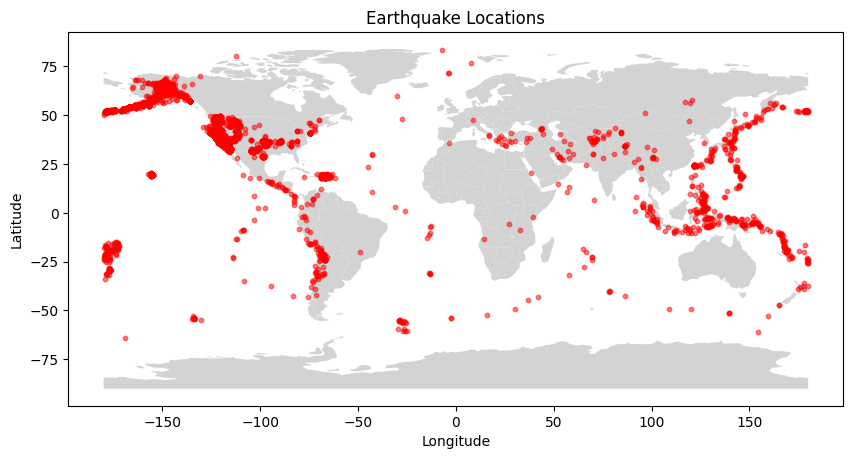

In [ ]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

# Plot base map
world.plot(ax=ax, color='lightgray')

#Plot earthquake points
geo_df.plot(ax=ax, markersize=10, color = 'red', alpha=0.5)

# Customize and show the plot
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('global_distribution.png')


plt.show()

In [ ]:
geo_df['net'].nunique()

15

**DATA ENCODING**

In [ ]:
cleaned_earthquake['mag']

0        1.03
1        1.28
2        0.27
3        1.89
4        1.02
         ... 
10032   -0.66
10033    0.32
10034    1.37
10035    1.50
10036    1.07
Name: mag, Length: 10037, dtype: float64

In [ ]:

clean_earthquake_encoded = pd.get_dummies(cleaned_earthquake, columns=['net', 'type', 'magType', 'status'], drop_first=True, sparse=False)
#clean_earthquake_encoded = clean_earthquake_encoded.replace({'automatic':1, 'reviewed':0})
#clean_earthquake_encoded = clean_earthquake_encoded.astype(int)
clean_earthquake_encoded.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,type_quarry blast,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_mlr,magType_mw,magType_mwr,magType_mww,status_reviewed
0,33.412498,-116.486168,12.14,1.03,19.0,102.0,0.127000,0.23,0.90,1.71,...,False,False,False,False,True,False,False,False,False,False
1,38.834835,-122.807335,2.21,1.28,27.0,50.0,0.011620,0.02,0.20,0.38,...,False,False,True,False,False,False,False,False,False,False
2,38.840168,-122.873001,1.87,0.27,8.0,97.0,0.003424,0.05,0.71,1.08,...,False,False,True,False,False,False,False,False,False,False
3,19.390333,-155.253326,0.67,1.89,18.0,49.0,0.005162,0.12,0.15,0.20,...,False,False,True,False,False,False,False,False,False,False
4,38.777168,-122.766335,1.11,1.02,9.0,88.0,0.006454,0.02,0.30,0.49,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
clean_earthquake_encoded.shape

(10037, 43)

In [ ]:
clean_earthquake_encoded.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,type_quarry blast,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_mlr,magType_mw,magType_mwr,magType_mww,status_reviewed
0,33.412498,-116.486168,12.14,1.03,19.0,102.0,0.127000,0.23,0.90,1.71,...,False,False,False,False,True,False,False,False,False,False
1,38.834835,-122.807335,2.21,1.28,27.0,50.0,0.011620,0.02,0.20,0.38,...,False,False,True,False,False,False,False,False,False,False
2,38.840168,-122.873001,1.87,0.27,8.0,97.0,0.003424,0.05,0.71,1.08,...,False,False,True,False,False,False,False,False,False,False
3,19.390333,-155.253326,0.67,1.89,18.0,49.0,0.005162,0.12,0.15,0.20,...,False,False,True,False,False,False,False,False,False,False
4,38.777168,-122.766335,1.11,1.02,9.0,88.0,0.006454,0.02,0.30,0.49,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
clean_earthquake_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   latitude           10037 non-null  float64       
 1   longitude          10037 non-null  float64       
 2   depth              10037 non-null  float64       
 3   mag                10037 non-null  float64       
 4   nst                10037 non-null  float64       
 5   gap                10037 non-null  float64       
 6   dmin               10037 non-null  float64       
 7   rms                10037 non-null  float64       
 8   horizontalError    10037 non-null  float64       
 9   depthError         10037 non-null  float64       
 10  magError           10037 non-null  float64       
 11  magNst             10037 non-null  float64       
 12  updated_date       10037 non-null  datetime64[ns]
 13  duration_time      10037 non-null  int64         
 14  durati

**Splitting the dataset**

In [ ]:
X = clean_earthquake_encoded.drop(axis=1, columns=['actual_place', 'updated_date', 'duration_hours', 'mag'])
y = clean_earthquake_encoded['mag']

**Linear Regression**

In [ ]:



reg = make_pipeline( PolynomialFeatures(degree=1), StandardScaler(), LinearRegression())
scores = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)
print(scores.mean())


0.3876533058929627
0.3876533058929627


**Ridge**

In [ ]:


ridge = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), Ridge(alpha = 100.0))
scores = cross_val_score(ridge, X, y, cv=20, scoring='neg_mean_absolute_error').mean()*-1
print(scores)
print(scores.mean())

0.3896561856988539
0.3896561856988539


In [ ]:


lasso = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), Lasso(alpha = 0.9))
scores = cross_val_score(ridge, X, y, cv=20, scoring='neg_mean_absolute_error').mean()*-1
print(scores)
print(scores.mean())

0.3896561856988539
0.3896561856988539


In [ ]:


elastic_net = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), ElasticNet(alpha = 1.0, l1_ratio=0.00001))
scores = cross_val_score(elastic_net, X, y, cv=5, scoring='neg_mean_absolute_error').mean()*-1
print(scores)


0.4826544294619877


In [ ]:

g_reg = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, min_samples_split = 5, learning_rate= 0.01, random_state=0)
scores = cross_val_score(g_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

0.30611055941368365


In [ ]:

param_grid = {
     "n_estimators": [500, 750, 1000],
    "max_depth": [2, 4, 6],
    "min_samples_split": [2,5],
    "learning_rate": [0.01, 0.1]}

grid_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score * -1)

{'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.1}
0.2584602976629916


In [ ]:

b_reg = BaggingRegressor(random_state=0)
scores = cross_val_score(b_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

0.26803634506460094


In [ ]:


param_grid = {
    'estimator' : [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()],
    'n_estimators': [5, 10, 20],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0]
}

random_search = RandomizedSearchCV(BaggingRegressor(), param_distributions=param_grid, cv=5, scoring='neg_mean_absolute_error')
random_search.fit(X, y)
best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print(best_score * -1)

{'n_estimators': 5, 'max_samples': 0.75, 'max_features': 1.0, 'estimator': RandomForestRegressor()}
0.26571027251936286


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=0))
]

s_reg = StackingRegressor(estimators = estimators)
scores = cross_val_score(s_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

0.25430067631511977


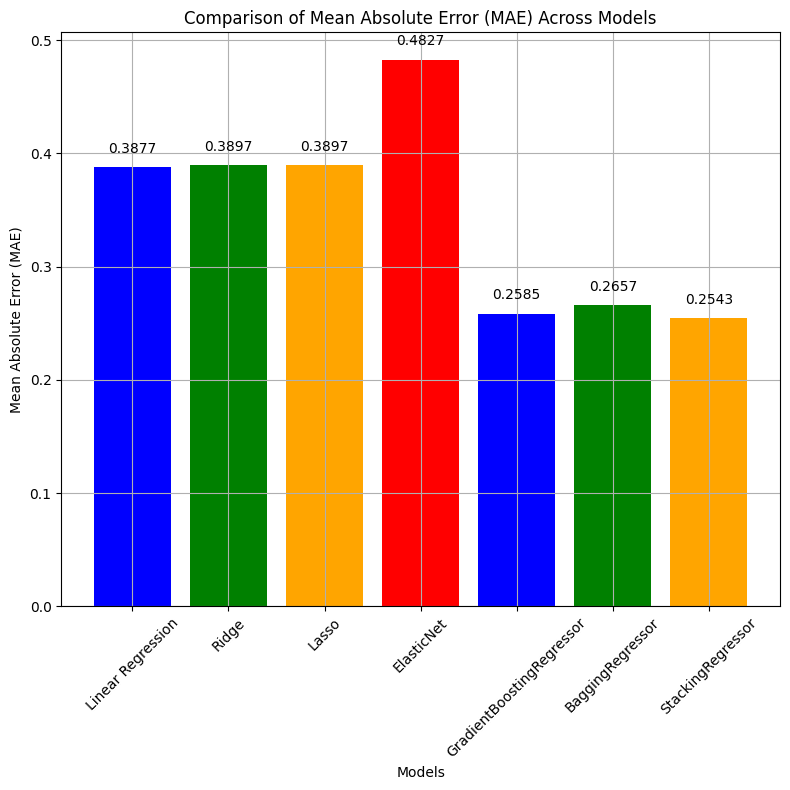

In [ ]:
models = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'GradientBoostingRegressor', 'BaggingRegressor', 'StackingRegressor']
mae_scores = [0.3876533058929627, 0.3896561856988539, 0.3896561856988539, 0.4826544294619877, 0.2584602976629916, 0.26571027251936286, 0.25430067631511977]

# Plotting the bar chart
plt.figure(figsize=(8, 8))
plt.bar(models, mae_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) Across Models')
#plt.ylim(0, 0.4)  # Adjust ylim if necessary

# Adding text labels for each bar
for i, score in enumerate(mae_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', va='bottom', fontsize=10)

plt.grid(True)
plt.tight_layout()

# Save and show the plot
plt.savefig('model_comparison_mae.png')
plt.show()